In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [114]:
# Copy of Experiment Output
from copied_result_data import *

In [115]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_fitness(
        data,
        invert=False,
        log_scale=False,
        benchmark_data=None,
        epsilon=1e-12,
        title="Fitness Over Generations"
):
    # Convert main data to DataFrame
    df = pd.DataFrame(data, columns=['Generation', 'Min_Fitness', 'Avg_Fitness'])

    # Apply reciprocal inversion if requested
    if invert:
        df['Min_Fitness'] = 1.0 / (df['Min_Fitness'] + epsilon)
        df['Avg_Fitness'] = 1.0 / (df['Avg_Fitness'] + epsilon)

    # Plot main data
    plt.figure(figsize=(8, 5))
    plt.plot(df['Generation'], df['Min_Fitness'], marker='o', label='Min. Ticks')
    plt.plot(df['Generation'], df['Avg_Fitness'], marker='o', label='Avg. Ticks')

    # Add benchmark line if provided
    if benchmark_data:
        benchmark_df = pd.DataFrame(benchmark_data, columns=['Generation', 'Min_Fitness', 'Avg_Fitness'])
        benchmark_val = benchmark_df['Min_Fitness'].min()
        if invert:
            benchmark_val = 1.0 / (benchmark_val + epsilon)
        plt.axhline(y=benchmark_val, color='red', linestyle='--', label=f'Benchmark: {benchmark_val:.0f}')

    # Apply log scale if requested
    if log_scale:
        plt.yscale('log')

    # Labels and title
    plt.title(title)
    plt.xlabel('Generation')
    plt.ylabel('Objective')
    plt.gca().xaxis.set_major_locator(MultipleLocator(1))
    plt.legend()
    plt.tight_layout()
    plt.show()


def plot_fitness_static_two_sets(
        fixed_data,
        all_data,
        invert=False,
        log_scale=False,
        benchmark_data=None,
        epsilon=1e-12,
        title="Fitness Over Generations (Fixed vs All)"
):
    # Convert both datasets to DataFrames
    df_fixed = pd.DataFrame(fixed_data, columns=['Generation', 'Min_Fitness', 'Avg_Fitness'])
    df_all = pd.DataFrame(all_data, columns=['Generation', 'Min_Fitness', 'Avg_Fitness'])

    # Apply reciprocal inversion if requested
    if invert:
        for df in (df_fixed, df_all):
            df['Min_Fitness'] = 1.0 / (df['Min_Fitness'] + epsilon)
            df['Avg_Fitness'] = 1.0 / (df['Avg_Fitness'] + epsilon)

    # Create figure
    plt.figure(figsize=(10, 6))

    # Plot Fixed
    plt.plot(df_fixed['Generation'], df_fixed['Min_Fitness'],
             color='C0', linewidth=2.0, marker='o', label='Fixed - Min')
    plt.plot(df_fixed['Generation'], df_fixed['Avg_Fitness'],
             color='C0', linewidth=1.5, linestyle=':', marker='o', alpha=0.8, label='Fixed - Avg')

    # Plot All
    plt.plot(df_all['Generation'], df_all['Min_Fitness'],
             color='C1', linewidth=2.0, marker='s', label='All - Min')
    plt.plot(df_all['Generation'], df_all['Avg_Fitness'],
             color='C1', linewidth=1.5, linestyle=':', marker='s', alpha=0.8, label='All - Avg')

    # Add benchmark line if provided
    if benchmark_data:
        benchmark_df = pd.DataFrame(benchmark_data, columns=['Generation', 'Min_Fitness', 'Avg_Fitness'])
        benchmark_val = benchmark_df['Min_Fitness'].min()
        if invert:
            benchmark_val = 1.0 / (benchmark_val + epsilon)
        plt.axhline(y=benchmark_val, color='red', linestyle='--',
                    label=f'Benchmark: {benchmark_val:.0f}')

    # Axes labels, title, grid, and legend
    plt.title(title)
    plt.xlabel('Generation')
    plt.ylabel('Objective')
    plt.gca().xaxis.set_major_locator(MultipleLocator(1))
    if log_scale:
        plt.yscale('log')

    plt.grid(True, which='both', linestyle='--', alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{title}.png")
    plt.show()


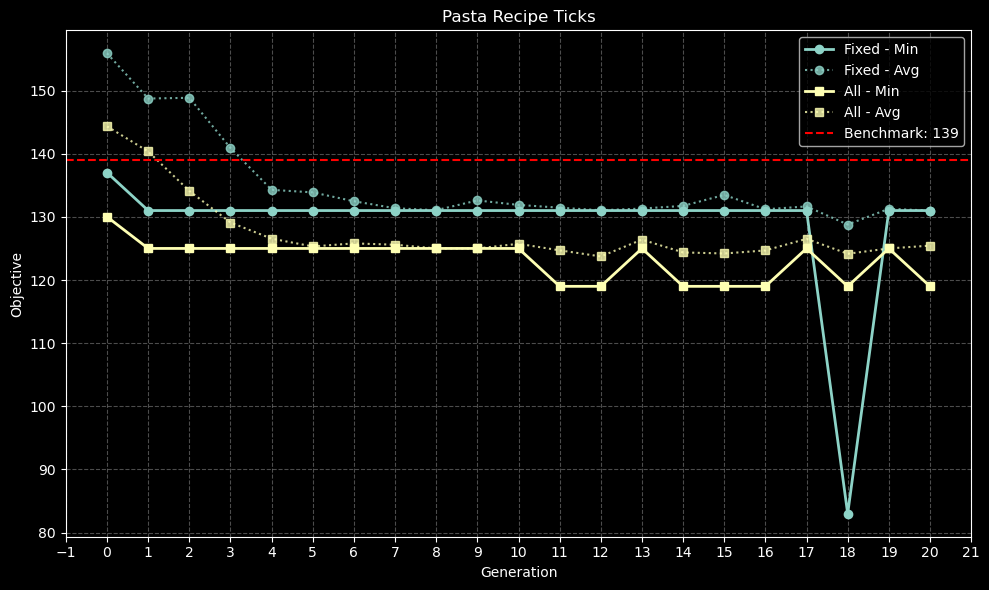

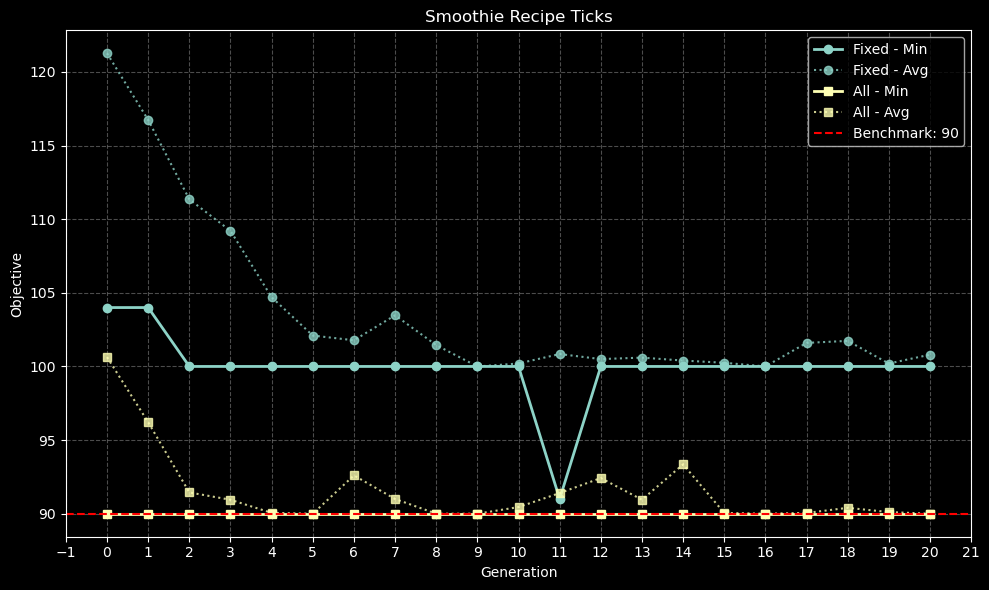

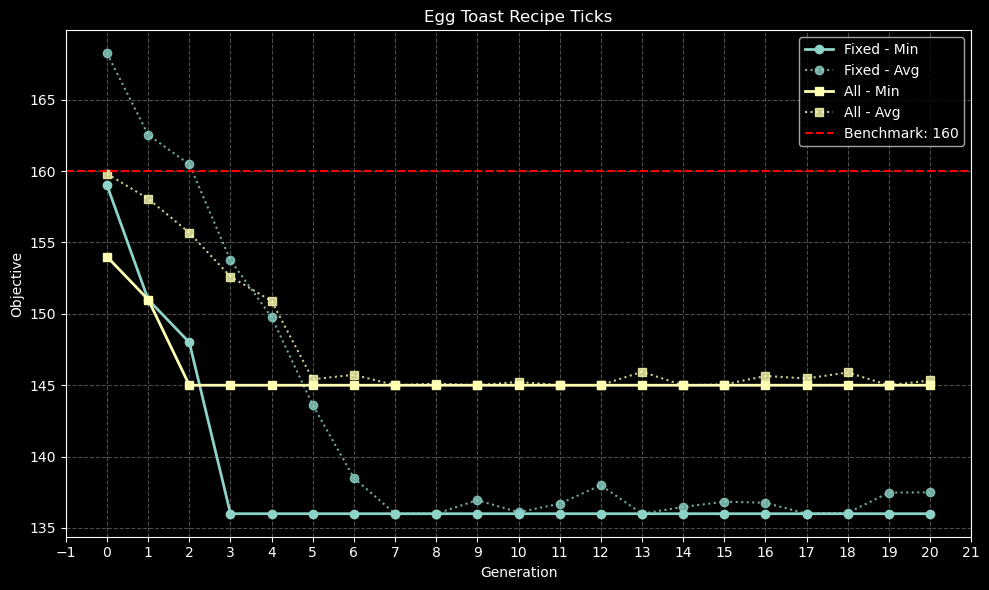

In [116]:
plot_fitness_static_two_sets(fixed_data=RESULT_SINGLE_PASTA_WITH_TOMATO_SAUCE_FIXED,
                             all_data=RESULT_SINGLE_PASTA_WITH_TOMATO_SAUCE_ALL,
                             benchmark_data=RESULT_SINGLE_PASTA_WITH_TOMATO_SAUCE_DISTANCE, title="Pasta Recipe Ticks")

plot_fitness_static_two_sets(fixed_data=RESULT_SINGLE_SMOOTHIE_FIXED,
                             all_data=RESULT_SINGLE_SMOOTHIE_ALL,
                             benchmark_data=RESULT_SINGLE_SMOOTHIE_DISTANCE,
                             title="Smoothie Recipe Ticks")

plot_fitness_static_two_sets(fixed_data=RESULT_SINGLE_EGG_TOAST_FIXED,
                             all_data=RESULT_SINGLE_EGG_TOAST_ALL,
                             benchmark_data=RESULT_SINGLE_EGG_TOAST_DISTANCE,
                             title="Egg Toast Recipe Ticks")

In [117]:
def stats_from_result_group(result_group):
    ga_better = 0
    fixed_better = 0
    all_better = 0
    all_better_than_fixed = 0
    fixed_better_than_all = 0
    total = len(result_group)
    fixed_over_dist = []
    all_over_dist = []
    for recipe_group in result_group:
        columns = []
        if len(recipe_group[0][0]) == 3:
            columns = ['Generation', 'Min_Fitness', 'Avg_Fitness']
        elif len(recipe_group[0][0]) == 5:
            columns = ['Generation', 'Min_Fitness', 'Avg_Fitness', 'Max_Fitness', 'Stdev']
        run_all = pd.DataFrame(recipe_group[0], columns=columns)
        run_dist = pd.DataFrame(recipe_group[1], columns=columns)
        run_fixed = pd.DataFrame(recipe_group[2], columns=columns)

        run_all_best = run_all['Min_Fitness'].min()
        run_dist_best = run_dist['Min_Fitness'].min()
        run_fixed_best = run_fixed['Min_Fitness'].min()

        if run_all_best < run_dist_best or run_fixed_best < run_dist_best: ga_better += 1
        if run_all_best < run_dist_best: all_better += 1
        if run_fixed_best < run_dist_best: fixed_better += 1
        if run_all_best < run_fixed_best: all_better_than_fixed += 1
        if run_fixed_best < run_all_best: fixed_better_than_all += 1

        fixed_over_dist.append(run_fixed_best / run_dist_best)
        all_over_dist.append(run_all_best / run_dist_best)

    print()
    print(f"GA better than dist: {ga_better / total}")
    print(f"Fixed better than dist: {fixed_better / total}")
    print(f"All better than dist: {all_better / total}")
    print(f"Fixed better than all: {fixed_better_than_all / total}")
    print(f"All better than fixed: {all_better_than_fixed / total}")
    print(f"Fixed avg. improvement over dist: {sum(fixed_over_dist) / total}")
    print(f"All avg. improvement over dist: {sum(all_over_dist) / total}")
    print(f"Fixed over dist: {fixed_over_dist}")
    print(f"All over dist: {all_over_dist}")


In [118]:
stats_from_result_group(RESULT_SINGLE_BY_RECIPE)


GA better than dist: 0.8
Fixed better than dist: 0.8
All better than dist: 0.8
Fixed better than all: 0.4
All better than fixed: 0.6
Fixed avg. improvement over dist: 0.8470401920481747
All avg. improvement over dist: 0.8868443262733132
Fixed over dist: [0.85, 0.5971223021582733, 0.8389830508474576, 1.011111111111111, 0.937984496124031]
All over dist: [0.90625, 0.8561151079136691, 0.788135593220339, 1.0, 0.8837209302325582]


In [119]:
stats_from_result_group([RESULT_ALL_COMBINED_2])


GA better than dist: 1.0
Fixed better than dist: 0.0
All better than dist: 1.0
Fixed better than all: 0.0
All better than fixed: 1.0
Fixed avg. improvement over dist: 1.038647342995169
All avg. improvement over dist: 0.9420289855072463
Fixed over dist: [1.038647342995169]
All over dist: [0.9420289855072463]


In [120]:
stats_from_result_group([RESULT_ALL_COMBINED_4])


GA better than dist: 1.0
Fixed better than dist: 0.0
All better than dist: 1.0
Fixed better than all: 0.0
All better than fixed: 1.0
Fixed avg. improvement over dist: 19.801980198019802
All avg. improvement over dist: 0.9128712871287129
Fixed over dist: [19.801980198019802]
All over dist: [0.9128712871287129]


In [121]:
counter = 0
for run in RESULT_ALL_SINGLE:
    table = pd.DataFrame(run, columns=['Generation', 'Min_Fitness', 'Avg_Fitness'])
    if counter == 0:
        print('')
        word = "Mixed"
    elif counter == 1:
        word = "Distance"
    elif counter == 2:
        word = "Fixed"
    counter += 1
    counter %= 3
    print(f'{word} {table['Min_Fitness'].min()}')


Mixed 145.0
Distance 160.0
Fixed 136.0

Mixed 119.0
Distance 139.0
Fixed 83.0

Mixed 93.0
Distance 118.0
Fixed 99.0

Mixed 90.0
Distance 90.0
Fixed 91.0

Mixed 114.0
Distance 129.0
Fixed 121.0


In [122]:
counter = 0
for run in RESULT_ALL_COMBINED_2:
    table = pd.DataFrame(run, columns=['Generation', 'Min_Fitness', 'Avg_Fitness'])
    if counter == 0:
        print('')
        word = "Mixed"
    elif counter == 1:
        word = "Distance"
    elif counter == 2:
        word = "Fixed"
    counter += 1
    counter %= 3
    print(f'{word} {table['Min_Fitness'].min()}')

counter = 0
for run in RESULT_ALL_COMBINED_4:
    table = pd.DataFrame(run, columns=['Generation', 'Min_Fitness', 'Avg_Fitness'])
    if counter == 0:
        print('')
        word = "Mixed"
    elif counter == 1:
        word = "Distance"
    elif counter == 2:
        word = "Fixed"
    counter += 1
    counter %= 3
    print(f'{word} {table['Min_Fitness'].min()}')


Mixed 195.0
Distance 207.0
Fixed 215.0

Mixed 461.0
Distance 505.0
Fixed 10000


In [123]:
stats_from_result_group(RESULT_RANDOM_BY_RECIPE)


GA better than dist: 0.4
Fixed better than dist: 0.4
All better than dist: 0.0
Fixed better than all: 0.4
All better than fixed: 0.6
Fixed avg. improvement over dist: 1.0849118382645786
All avg. improvement over dist: 1.029019386625213
Fixed over dist: [0.9767441860465116, 1.180952380952381, 1.087378640776699, 1.1971830985915493, 0.9823008849557522]
All over dist: [1.0232558139534884, 1.0380952380952382, 1.0097087378640777, 1.056338028169014, 1.0176991150442478]


In [124]:
stats_from_result_group([RESULT_ALL_COMBINED_2_RANDOM])


GA better than dist: 1.0
Fixed better than dist: 0.0
All better than dist: 1.0
Fixed better than all: 0.0
All better than fixed: 1.0
Fixed avg. improvement over dist: 1.109452736318408
All avg. improvement over dist: 0.9651741293532339
Fixed over dist: [1.109452736318408]
All over dist: [0.9651741293532339]


In [125]:
stats_from_result_group([RESULT_ALL_COMBINED_4_RANDOM])


GA better than dist: 1.0
Fixed better than dist: 0.0
All better than dist: 1.0
Fixed better than all: 0.0
All better than fixed: 1.0
Fixed avg. improvement over dist: 22.271714922048996
All avg. improvement over dist: 0.9866369710467706
Fixed over dist: [22.271714922048996]
All over dist: [0.9866369710467706]


In [126]:
counter = 0
for run in RESULT_ALL_RANDOM:
    table = pd.DataFrame(run, columns=['Generation', 'Min_Fitness', 'Avg_Fitness', 'Max_Fitness', 'Stdev'])
    if counter == 0:
        print('')
        word = "Mixed"
    elif counter == 1:
        word = "Distance"
    elif counter == 2:
        word = "Fixed"
    counter += 1
    counter %= 3
    print(f'{word} {table['Avg_Fitness'].mean(), table['Avg_Fitness'].std()}')


Mixed (160.0, 0.9192388155425198)
Distance (150.97105263157894, 4.424999804372657)
Fixed (149.71842105263158, 0.02605130246477029)

Mixed (130.0, 0.14142135623730148)
Distance (129.375, 0.8838834764831844)
Fixed (142.89473684210526, 0.5954583420518264)

Mixed (121.55000000000001, 0.565685424949236)
Distance (121.7, 1.7677669529663689)
Fixed (133.33157894736843, 0.09676198058342103)

Mixed (98.325, 1.2374368670764582)
Distance (92.225, 3.5001785668734122)
Fixed (106.71944444444443, 2.36095097496175)

Mixed (137.0421052631579, 0.5061395907440654)
Distance (138.34722222222223, 5.794347234723107)
Fixed (139.70921052631581, 0.9322644667748949)


In [127]:
counter = 0
for run in RESULT_ALL_COMBINED_2_RANDOM:
    table = pd.DataFrame(run, columns=['Generation', 'Min_Fitness', 'Avg_Fitness', 'Max_Fitness', 'Stdev'])
    if counter == 0:
        print('')
        word = "Mixed"
    elif counter == 1:
        word = "Distance"
    elif counter == 2:
        word = "Fixed"
    counter += 1
    print(f'{word} {table['Avg_Fitness'].mean(), table['Avg_Fitness'].std()}')

counter = 0
for run in RESULT_ALL_COMBINED_4_RANDOM:
    table = pd.DataFrame(run, columns=['Generation', 'Min_Fitness', 'Avg_Fitness', 'Max_Fitness', 'Stdev'])
    if counter == 0:
        print('')
        word = "Mixed"
    elif counter == 1:
        word = "Distance"
    elif counter == 2:
        word = "Fixed"
    counter += 1
    print(f'{word} {table['Avg_Fitness'].mean(), table['Avg_Fitness'].std()}')


Mixed (222.0296052631579, 3.7541787659048875)
Distance (221.13157894736844, 2.6423463928549884)
Fixed (252.51461988304092, 5.59896246623734)

Mixed (485.1709401709402, 0.08461106783430251)
Distance (475.075, 6.611448404094236)
Fixed (10000.0, nan)


In [128]:
counter = 0
for run in RESULT_ALL_PARTIALS:
    table = pd.DataFrame(run, columns=['Generation', 'Min_Fitness', 'Avg_Fitness', 'Max_Fitness', 'Stdev'])
    if counter == 0:
        print('')
        word = "Mixed"
    elif counter == 1:
        word = "Distance"
    elif counter == 2:
        word = "Fixed"
    counter += 1
    counter %= 3
    print(f'{word} {table['Min_Fitness'].min()}')


Mixed 215.0
Distance 209.0
